In [27]:
import os
from numpy import argmax
import random as rn
from pandas import read_csv
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input,Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model



In [23]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
data=read_csv(path,header=None)
X, y = data.values[:, :-1], data.values[:, -1]
SEED = 123456
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)


In [24]:
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(100, 4) (50, 4) (100,) (50,)
(100, 4) (50, 4) (100,) (50,)


In [5]:
n_features=X_train.shape[1]

In [51]:
model=Input(shape=(4,))
model1= Dense(50,activation='relu')(model)
model2= Dense(25,activation='relu')(model1)

modelX=Dense(3,activation='softmax')(model2)
iris_model= Model(inputs=model, outputs=modelX)
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [54]:
iris_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8000
Epoch 2/30
4/4 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8100
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8600
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.9500
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.9500
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.9500
Epoch 7/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.9700
Epoch 8/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.9500
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.9500
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.9300
Epoch 11/30
4/4 [======================

In [55]:
loss, acc = iris_model.evaluate(X_test, y_test, verbose=0)


In [56]:
print('Test Accuracy: %.3f' % acc)


Test Accuracy: 0.980


In [57]:
row = [5.1,3.5,1.4,0.2]
yhat = iris_model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[9.8038048e-01 1.8931463e-02 6.8805809e-04]] (class=0)


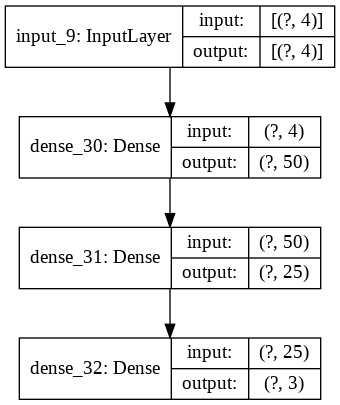

In [58]:
plot_model(iris_model, 'model.png', show_shapes=True)